<a href="https://colab.research.google.com/github/SimonT2003/MAT422/blob/main/HW_1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis in Python**

## **Introduction to PCA**

Principal Component Analysis (PCA) is a **linear dimensionality reduction** technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

## **Where Can You Apply PCA?**



*  **Data Visualization**: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.
Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.
*   **Speeding Up a Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.



### **Key Concepts**



*   Singular Value Decomposition
*   Low-Rank Matrix Approximations
*   Principal Component Analysis



In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from IPython.display import display, Image

**Global Variables**

In [2]:
# Generate a random mxn matrix
m = 4
n = 5
A = np.random.randint(100, size=(m, n))

print(f"Random {m}x{n} Matrix A:")
print(A)

Random 4x5 Matrix A:
[[63 76 77 53 72]
 [51 36 43 34 25]
 [33 55 39 24 68]
 [90 37 20 52  0]]


## **Singular Value Decomposition**

Eigendecomposition can only be done for Square matrices. Singular Value Decomposition (SVD) can be used to decompose every matrix, regardless of shape, or if the eigenvalues are complex or if the eigenvectors are not orthogonal.

SVD Model: $M=U∑V^T$

where:



*   $M$: is the original matrix we want to decompose.
*   $U$: is left singular matrix (columns are left singular vectors). $U$ columns contain eigenvectors of matrix $MM^T$.
*   $∑$: is a diagonal matrix containing singular (eigen)values. Also referred to using $D$.
*   $V$: is right singular matrix (columns are right singular vectors). $V$ columns contain eigenvectors of matrix $M^TM$.


In [3]:
# Singular Value Decomposition Visualization
svd_url = r"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1024px-Singular_value_decomposition_visualisation.svg.png"
display(Image(url=svd_url, width=300, unconfined=True))

In [4]:
def svd(A: np.ndarray):
    """
    Singular Value Decomposition
    :param A: Matrix A
    :return: (U, D, V)
    """
    At = A.transpose()

    # Compute the Eigenvalues and Eigenvectors of AAt
    L, U = np.linalg.eig(np.dot(A, At))
    # U is the matrix of eigenvectors

    # D is the squareroot of eigenvalues
    D = np.sqrt(L)
    # Remove 0 elements
    D = D[D != 0]
    # Sort
    D[::-1].sort()

    # Compute the Eigenvalues and Eigenvectors of AtA
    _, V = np.linalg.eig(np.dot(At, A))

    return U, D, V

In [5]:
UA, DA, VA = svd(A)

print(f"Orthogonal Matrix U:\n{UA}\n")
print(f"Diagonal Matrix D:  \n{DA}\n")
print(f"Orthogonal Matrix V:\n{VA}\n")

Orthogonal Matrix U:
[[ 0.68976478  0.29119513 -0.53022372 -0.39786023]
 [ 0.38830747 -0.1360232   0.78188794 -0.46836551]
 [ 0.44121919  0.45846813  0.28907817  0.71523871]
 [ 0.42280905 -0.82855903 -0.15475099  0.33282815]]

Diagonal Matrix D:  
[220.47765679  74.79477486  19.49854828   4.14139172]

Orthogonal Matrix V:
[[-0.52554944 -0.64219398 -0.23620094  0.50325631 -0.04823778]
 [-0.48219028  0.15767222 -0.23356789 -0.47701927 -0.6786241 ]
 [-0.43302727  0.23908226  0.83206614  0.23494137 -0.08829237]
 [-0.37344064 -0.28442202  0.13017516 -0.63428974  0.60031421]
 [-0.40536378  0.65166721 -0.42470639  0.24832394  0.41105931]]



### **Verify with np.linalg.svg**

In [6]:
UA, DA, VA = np.linalg.svd(A)

print(f"Orthogonal Matrix U:\n{UA}\n")
print(f"Diagonal Matrix D:  \n{DA}\n")
print(f"Orthogonal Matrix V:\n{VA}\n")

Orthogonal Matrix U:
[[-0.68976478 -0.29119513 -0.39786023 -0.53022372]
 [-0.38830747  0.1360232  -0.46836551  0.78188794]
 [-0.44121919 -0.45846813  0.71523871  0.28907817]
 [-0.42280905  0.82855903  0.33282815 -0.15475099]]

Diagonal Matrix D:  
[220.47765679  74.79477486  19.49854828   4.14139172]

Orthogonal Matrix V:
[[-0.52554944 -0.48219028 -0.43302727 -0.37344064 -0.40536378]
 [ 0.64219398 -0.15767222 -0.23908226  0.28442202 -0.65166721]
 [ 0.23620094  0.23356789 -0.83206614 -0.13017516  0.42470639]
 [ 0.50325631 -0.47701927  0.23494137 -0.63428974  0.24832394]
 [-0.04823778 -0.6786241  -0.08829237  0.60031421  0.41105931]]



### **Performance Comparison**

In [7]:
%%timeit -n 100
svd(A)

84.9 µs ± 32 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit -n 100
np.linalg.svd(A)

28.1 µs ± 4.19 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**np.linalg.svd is ~4x faster than the custom svd implementation.**

## **Low-Rank Matrix Approximations**

**Applications:**


*   Dimensionally reduces matrices and generate a (lossy) compressed version.
*   Solve optimization problems
*   Matrix completion



### **Ranks**

Rank-0: Zero matrix

Rank-1: Rows are multiple of each other

Rank-2: Sum of 2 Rank-1 matrices

Rank-K: Sum of K Rank-1 matrices and cannot be simplified to less than k-1 Rank-1 matrices

### **Computing a low-rank approximation**



1.   Compute SVD
2.   Keep k left vectors of U
3.   Keep k diagonal values of S
4.   Keep k top vectors of V

We essentially retain the k most important values of a vector A where $k ≤ m ≤ n$.



**Choosing the right k value** The sum of the top k singular values should be at least c times the sum of the other singular values.

### **Image Compression Demo**

In [64]:
from PIL import Image

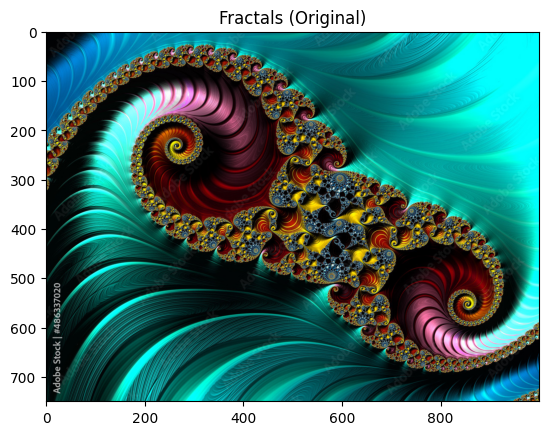

Original Image Size: (1000, 750)


In [66]:
# Load image of fractals
fractals = Image.open('Fractals_image.jpg')
fractals_size = fractals.size

plt.figure()
plt.imshow(fractals)
plt.title("Fractals (Original)")
plt.show()

# Print image size
print(f"Original Image Size: {fractals_size}")

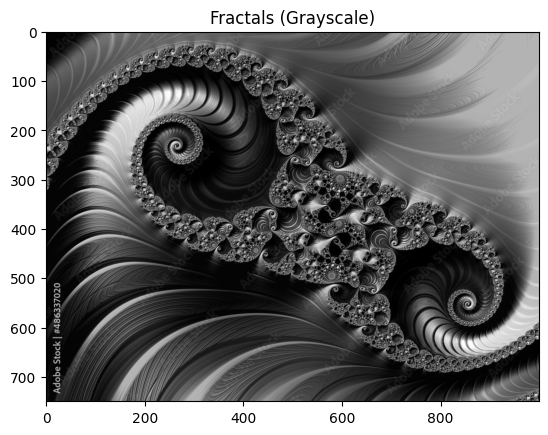

In [67]:
# Convert to Grayscale
fg = fractals.convert("LA")

# Construct Numpy array of the R-band
fa = np.array(list(fg.getdata(band=0)), float)

# Resize
fa.shape = (fractals_size[1], fractals_size[0])

# Display image
plt.figure()
plt.imshow(fa, cmap="gray")
plt.title("Fractals (Grayscale)")
plt.show()

### **Compute SVD**

In [68]:
hu, hd, hv = np.linalg.svd(fa)

# Compare sizes
print("SVD Array Sizes")
print(f"U: {hu.shape}")
print(f"D: {hd.shape}")
print(f"V: {hv.shape}")

print(f"\nOriginal Image Size: {(hu.nbytes + hd.nbytes + hv.nbytes)/2**20:.2f} mB")

SVD Array Sizes
U: (750, 750)
D: (750,)
V: (1000, 1000)

Original Image Size: 11.93 mB


### **Compress Image**

Note: Image sizes are going to be much larger than the .jpeg file. This is because we uncompress the file and process the data as a large array of pixels.

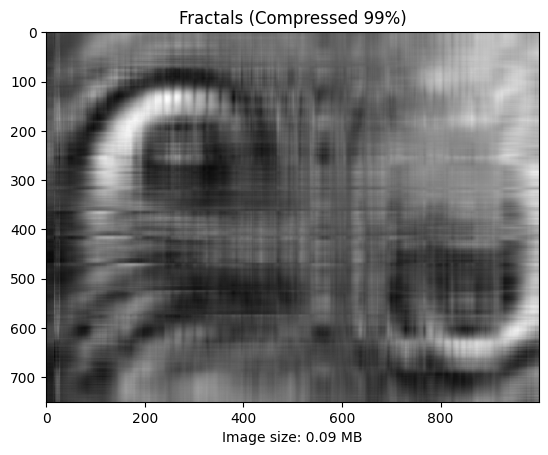

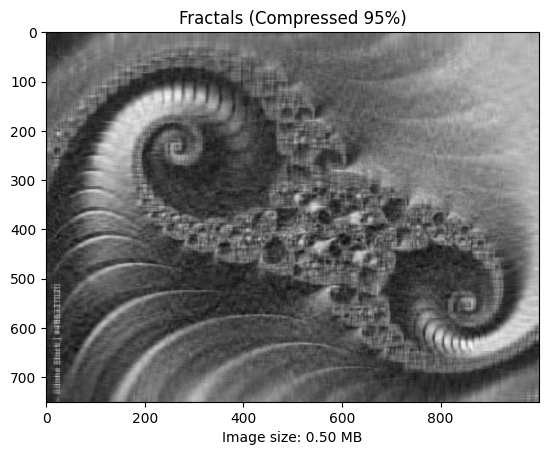

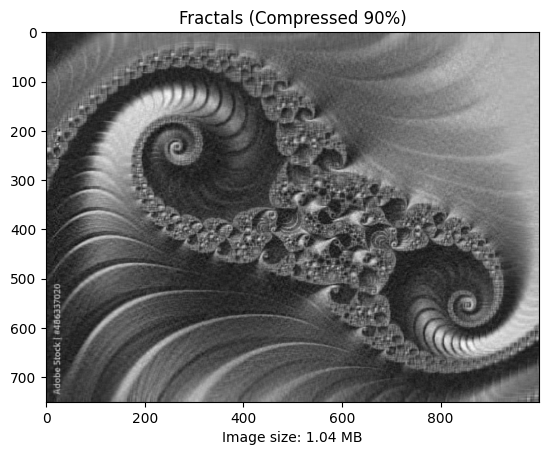

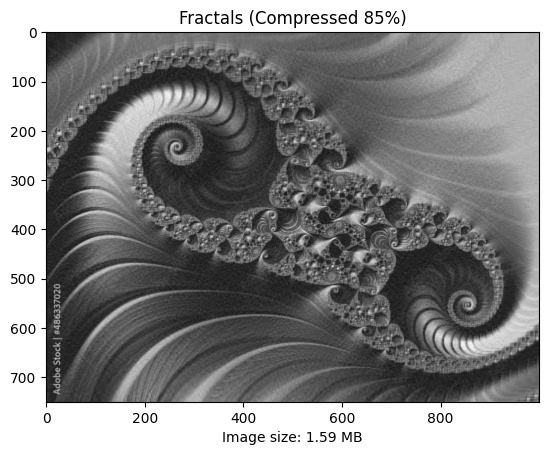

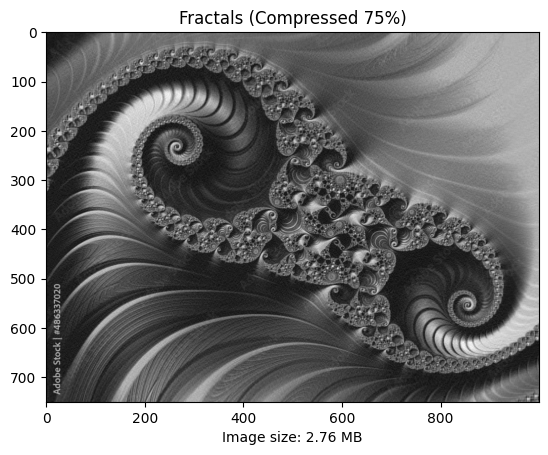

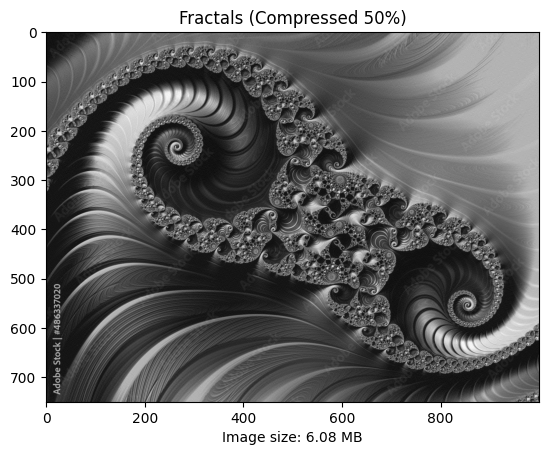

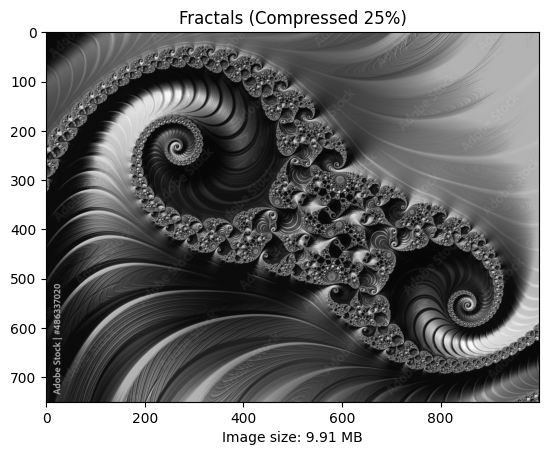

In [69]:
compressions = [1, 5, 10, 15, 25, 50, 75]

for i, r in enumerate([min(fractals_size) * c // 100 for c in compressions]):
    # Compress image
    hur = np.matrix(hu[:,:r])
    hdr = np.diag(hd[:r])
    hvr = np.matrix(hv[:r,:])
    hac = hur * hdr * hvr

    # Display image
    plt.figure()
    plt.imshow(hac, cmap="gray")
    plt.title(f"Fractals (Compressed {100-compressions[i]}%)")
    plt.xlabel(f"Image size: {(hur.nbytes + hdr.nbytes + hvr.nbytes)/2**20:.2f} MB", ha="center")
    plt.show()

## **Principal Component Analysis**

### **Computing PCA**



1.   **Standardize Variables**: make variables equally weighted (in terms of range) to prevent one variable from dominating over others. $z=\frac{v-\overline{v}}{σ}$
2.   **Compute Covariance Matrix**:compare the relationships between the variables. Helps identify and reduce closely related variables.
3.   **Identify the Principal Components**: compute the eigenvectors and eigenvalues of the covariance matrix to determine the Principal Components of the data.
4. **Generate Feature Vector**: Generates the weights for each of the selected Principal Components.
5. **Project Data on the Principal Component Axes**: Remodel and fit the data to the generated Principal Components and Feature Vectors.



### **PCA Dataset Dimension Reduction Demo**

In [75]:
# Load Diabetes Dataset from scikit-learn
df = datasets.load_diabetes(as_frame=True).data
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### **Standardize Variables**

In [76]:
df_mean = df.mean()
df_std = df.std()

# Standardize each column
for col in df.columns:
    df[col] = df[col].apply(lambda x: (x - df_mean[col])/df_std[col])

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.799594  1.064282  1.295620  0.459320 -0.928693 -0.731236 -0.911418   
1 -0.039522 -0.937474 -1.080955 -0.552878 -0.177423 -0.402430  1.562643   
2  1.791277  1.064282  0.933475 -0.119079 -0.957588 -0.718084 -0.679475   
3 -1.870322 -0.937474 -0.243495 -0.769778  0.256002  0.524802 -0.756789   
4  0.113044 -0.937474 -0.764079  0.459320  0.082632  0.327519  0.170984   

         s4        s5        s6  
0 -0.054438  0.418057 -0.370569  
1 -0.829361 -1.434962 -1.936285  
2 -0.054438  0.060087 -0.544537  
3  0.720486  0.476443 -0.196600  
4 -0.054438 -0.671740 -0.979458  


### **Compute Covariance Matrix**

In [77]:
df_cov = df.cov()

# Plot covariance matrix
df_cov_fig = df_cov.style.background_gradient(cmap='coolwarm').format("{:.2f}")
display(df_cov_fig)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


### **Identify Principal Components**

In [78]:
# Compute Eigenvalues and Eigenvectors of the Covariance matrix
df_cov_evals, df_cov_evecs = np.linalg.eig(df_cov)

# Map cols to eigenvalues
dfc_evl_dict = dict(zip(df.columns, df_cov_evals))
print("Eigenvalues:")
for k, v in dfc_evl_dict.items():
    print(f"{k}: {v:2f}")

# Get the top 2 Principal Components
df_pc1, df_pc2 = sorted(dfc_evl_dict)[:2]
print(f"\nPrincipal Components: {df_pc1} and {df_pc2}")

Eigenvalues:
age: 4.024211
sex: 1.492320
bmi: 1.205966
bp: 0.955476
s1: 0.008561
s2: 0.078320
s3: 0.662181
s4: 0.433682
s5: 0.602717
s6: 0.536566

Principal Components: age and bmi


### **Sources**



*   https://github.com/punitarani/MAT-494/blob/master/1.4%20Principal%20Component%20Analysis.ipynb
*   https://www.datacamp.com/tutorial/principal-component-analysis-in-python
*   https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2#:~:text=General%20formula%20of%20SVD%20is,columns%20are%20left%20singular%20vectors.

